In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from tensorflow import keras

%matplotlib inline

In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [4]:
train_set_x_orig.shape
train_set_y.shape
test_set_x_orig.shape
test_set_y.shape

print(train_set_x_orig.shape, '\n', 
      train_set_y.shape, '\n', 
      test_set_x_orig.shape, '\n', 
      test_set_y.shape)

(209, 64, 64, 3) 
 (1, 209) 
 (50, 64, 64, 3) 
 (1, 50)


In [5]:
print(type(train_set_x_orig))

# concatenamos ambos conjuntos de X para que no estén desproporcionados
new_x = np.concatenate((train_set_x_orig, test_set_x_orig), axis=0)
new_x.shape

<class 'numpy.ndarray'>


(259, 64, 64, 3)

In [6]:
new_y = np.concatenate((train_set_y.T, test_set_y.T), axis=0)
new_y.shape

(259, 1)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# lo volvemos a separar ya con la correcta separación, no tan desproporcionada como antes
# podemos probar 80%- 20%
X_train, X_test, y_train, y_test = train_test_split(new_x,
                                                    new_y, 
                                                    test_size=0.1,
                                                    random_state=50)

print(X_train.shape) 
print(y_train.shape)
# X_test contains 25% of total dataset
print(X_test.shape) 
print(y_test.shape)

(233, 64, 64, 3)
(233, 1)
(26, 64, 64, 3)
(26, 1)


In [9]:
X_train_n = X_train / 255

X_test_n = X_test / 255


In [10]:
from keras.utils import to_categorical 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Your code below

Use layers.Conv2D

For instance for first layer

network.add(layers.Conv2D(32, (3, 3),
                         activation='relu',
                         input_shape=(64, 64, 3)))

and after that

network.add(layers.MaxPool2D((2,2)))

and for output layer

network.add(layers.Flatten())
network.add(layers.Dense(256,
                        activation = 'relu'))            
network.add(layers.Dense(2, 
                         activation='softmax'))




In [11]:
from keras import models
from keras import layers

In [12]:
network = models.Sequential()

# primera capa convolucional, 32 neuronas, filtro 3x3
network.add(layers.Conv2D(32,  (3, 3),
                         activation='relu',
                         input_shape=(64, 64, 3)))

# downsampling max pooling 2x2
network.add(layers.MaxPool2D(2,2))

# segunda capa convolucional, 64 neuronas, filtro 3x3
network.add(layers.Conv2D(64,  (3, 3),
                         activation='relu'))

# downsampling max pooling 2x2
network.add(layers.MaxPool2D(2,2))

# capa de salida
network.add(layers.Flatten())
network.add(layers.Dense(256, activation = 'relu'))
network.add(layers.Dense(2, 
                         activation='softmax'))

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 256)               3

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [15]:
from keras.utils.vis_utils import plot_model

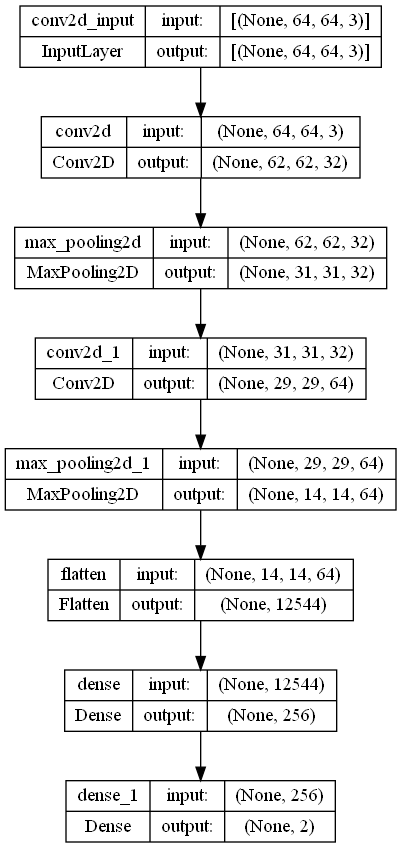

In [16]:
plot_model(network, 
           to_file = 'model_plot_00.png', 
           show_shapes = True, 
           show_layer_names = True)

In [17]:
network.fit(X_train_n,
           y_train,
           epochs = 10,
           batch_size = 32)

Epoch 1/10
8/8 [==============================] - 1s 49ms/step - loss: 1.4730 - accuracy: 0.5451
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 0.6472 - accuracy: 0.5923
Epoch 3/10
8/8 [==============================] - 0s 39ms/step - loss: 0.5864 - accuracy: 0.6695
Epoch 4/10
8/8 [==============================] - 0s 40ms/step - loss: 0.5716 - accuracy: 0.7167
Epoch 5/10
8/8 [==============================] - 0s 40ms/step - loss: 0.5281 - accuracy: 0.7253
Epoch 6/10
8/8 [==============================] - 0s 40ms/step - loss: 0.4394 - accuracy: 0.8197
Epoch 7/10
8/8 [==============================] - 0s 40ms/step - loss: 0.3363 - accuracy: 0.8455
Epoch 8/10
8/8 [==============================] - 0s 41ms/step - loss: 0.4384 - accuracy: 0.7511
Epoch 9/10
8/8 [==============================] - 0s 40ms/step - loss: 0.4177 - accuracy: 0.8112
Epoch 10/10
8/8 [==============================] - 0s 39ms/step - loss: 0.2329 - accuracy: 0.9313


In [18]:
test_loss, test_acc = network.evaluate(X_test_n, y_test)
print('test_acc', test_acc)

1/1 [==============================] - 0s 100ms/step - loss: 2.2163 - accuracy: 0.5000
test_acc 0.5
